In [2]:
import os
import numpy as np

data = {
    "boersma": {
        "GVM009": {},
        "GVM017": {},
        "GVM019": {},
        "GVM031": {},
        "GVM097": {}
    },
    "noll": {
        "GVM009": {},
        "GVM017": {},
        "GVM019": {},
        "GVM031": {},
        "GVM097": {}
    },
    "praat": {
        "GVM009": {},
        "GVM017": {},
        "GVM019": {},
        "GVM031": {},
        "GVM097": {}
    },
    "yin": {
        "GVM009": {},
        "GVM017": {},
        "GVM019": {},
        "GVM031": {},
        "GVM097": {}
    },
    "crepe": {
        "GVM009": {},
        "GVM017": {},
        "GVM019": {},
        "GVM031": {},
        "GVM097": {}
    },
    "maddox": {
        "GVM009": {},
        "GVM017": {},
        "GVM019": {},
        "GVM031": {},
        "GVM097": {}
    },
    "hermes": {
        "GVM009": {},
        "GVM017": {},
        "GVM019": {},
        "GVM031": {},
        "GVM097": {}
    }
}

def separate(adir, algo):
    conv={}
    conv[0] = lambda s: float(s.strip() or 0)
    x,y = np.loadtxt(adir, unpack=True, usecols=(0,1), converters=conv)
    return (x,y)

data_dir = "/Akamai/voice/data/pitches/"



for algorithm in sorted(os.listdir(data_dir)):
    if algorithm in data:
        for collection in sorted(os.listdir(f"{data_dir}{algorithm}")):
            for song in sorted(os.listdir(f"{data_dir}{algorithm}/{collection}")):
                for location in sorted(os.listdir(f"{data_dir}{algorithm}/{collection}/{song}")):
                    if (location[-4:] == '.txt'):
                        x, y = separate(f"{data_dir}{algorithm}/{collection}/{song}/{location}", algo=algorithm)
                        data[algorithm][song[:6]][location[-10:-4]] = (x, y)
                        

In [3]:
def find_outliers (x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    
    iqr = (q3 - q1)
    
    l = q1 - 1.5 * iqr
    r = q3 + 1.5 * iqr
    
    a = np.std(x[np.logical_and(x >= l, x <= r)])
    return a
    

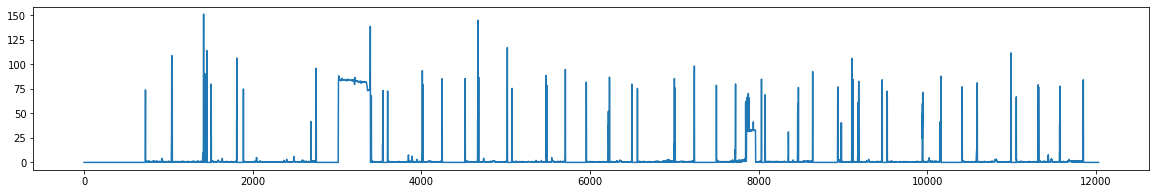

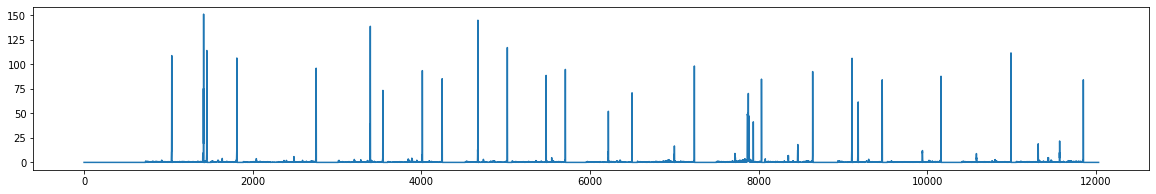

In [27]:
import matplotlib.pyplot as plt

target_collection = 'GVM009'
target_song = 'ALRX1M'

algos = []
s = float('inf')
i = False
for algo in data.keys():
    i = False
    if algo == 'yin':
        continue
    algos.append(data[algo][target_collection][target_song][1])
    s = min(s, len(data[algo][target_collection][target_song][1]))
    
for i in range(len(algos)):
    algos[i] = algos[i][:s]

algos = np.array(algos)

vari = np.std(algos, axis=0)
plt.figure(figsize=(20, 3))
plt.plot(vari)

wo_outliers = np.empty(vari.size)
for i in range(algos.shape[1]):
    wo_outliers[i] = find_outliers(algos[:, i])
#     if wo_outliers[i] > 10:
#         wo_outliers[i] = 0
#         for j in range(algos.shape[0]):
            #print(round(np.sort(algos[:, i])[j]), end=' ')
#         print()
plt.figure(figsize=(20, 3))
plt.plot(wo_outliers)